In [1]:
import numpy as np
from mayavi import mlab
import matplotlib.pyplot as plt
import pickle

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))

import horus as ho

In [2]:
from simsopt.configs import get_w7x_data

In [3]:
w7x = get_w7x_data()

In [4]:
from simsopt.field import Current

In [5]:
currents = [Current(1.109484) * 1e6 for _ in range(5)]
currents.append(Current(-0.3661) * 1e6)
currents.append(Current(-0.3661) * 1e6)

In [6]:
bs, bsh, (nfp, coils, ma, sc_fieldline) = ho.stellarator(w7x[0], currents, w7x[2], nfp=5, surface_radius=2)

#### Plot the current difference

In [ ]:
curr_diff = []
for actual, base in zip(currents,  w7x[1]):
    curr_diff.append(actual.current_to_scale.current * 1e6 - base.current)

In [ ]:
cmap = plt.colormaps['RdBu']
norm = plt.Normalize(min(curr_diff), max(curr_diff))
colors = cmap(norm(curr_diff))
colors = colors[:, :3]

In [ ]:
def rep(data):
            if close:
                return np.concatenate((data, [data[0]]))
            else:
                return data

In [ ]:
# Assuming curr_diff is a list of differences in currents
# Normalize curr_diff to the range [0, 1] for coloring

# Plot the coils
for i, coil in enumerate(coils):
    c


mlab.colorbar(orientation='vertical', title='Current Difference')
mlab.show()

In [ ]:
from mayavi import mlab
for i, coil in enumerate(coils):
    coil.plot(engine="mayavi", show=False, color=tuple(colors[i%7]))

# get the current lut manager
mlab.colorbar(orientation='vertical', title='Current Difference')
mlab.show()

#### Poincare

In [ ]:
for coil in coils:
    coil.plot(engine="mayavi", show=False)

mlab.show()

In [ ]:
nfieldlines = 50
phis = [0]    #[(i / 4) * (2 * np.pi / nfp) for i in range(4)]
Rs = np.linspace(6.1, 6.2, nfieldlines)
Zs = [ma.gamma()[0, 2] for _ in range(nfieldlines)]
RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

In [ ]:
_, _, fig, ax = ho.poincare(bsh, RZs, phis, sc_fieldline, tol = 1e-10)

In [ ]:
for col in ax[0,0].collections:
    col.set_color('black')
    col.set_sizes([0.5])

In [ ]:
#import pickle
#pickle.dump(fig, open("output/poincare_figure_GYM000+1750_black.pickle", "wb"))

#### Finding fix-point

In [8]:
fig = pickle.load(open("../output/poincare_figure_GYM000+1750_black.pickle", "rb"))
ax = fig.get_axes()[0]

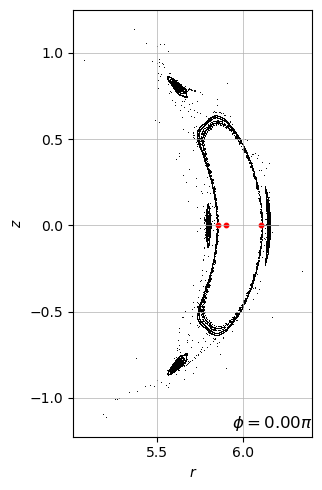

In [12]:
# guess = [5.6, 0.8] # O point
# guess = [5.7, 0.5] # X point
guess = [6.1, 0]
ax.scatter(guess[0], guess[1], c='r', s=10)
fig

In [ ]:
from pyoculus.solvers import FixedPoint
ps = ho.SimsoptBfieldProblem(ma.gamma()[0, 0], 0, 5, bs)

In [ ]:
gamma = ho.trace(bs, 40*2*np.pi, [5.72, 0, 0.68], tol=1e-9)

In [ ]:
from mayavi import mlab
for coil in coils:
    coil.plot(engine="mayavi", show=False)

mlab.plot3d(gamma[0, :], gamma[1, :], gamma[2, :], tube_radius=0.01, color=(0, 0, 1))

mlab.show()

In [ ]:
# set up the integrator
iparams = dict()
iparams["rtol"] = 1e-9

pparams = dict()
pparams["nrestart"] = 0
pparams["tol"] = 1e-8
pparams['niter'] = 100

fp = FixedPoint(ps, pparams, integrator_params=iparams)
fp.compute(guess=guess, pp=5, qq=4, sbegin=5.2, send=6.2, checkonly=True)

In [ ]:
results = [list(p) for p in zip(fp.x, fp.y, fp.z)]

In [ ]:
results

In [ ]:
for rr in results:
    ax.scatter(rr[0], rr[2], marker="X", edgecolors="black", linewidths=1)
fig

#### Tracing stable and unstable manifolds

In [ ]:
from scipy.integrate import solve_ivp

In [ ]:
M = fp.jacobian

In [ ]:
eigRes = np.linalg.eig(M)

In [ ]:
lambda_u = eigRes.eigenvalues[0]
lambda_v = eigRes.eigenvalues[1]

print(lambda_u, lambda_v)

In [ ]:
u = eigRes.eigenvectors[0]
v = eigRes.eigenvectors[1]

print(u, v)

In [ ]:
eps = np.atleast_2d(np.linspace(1e-10, 1e-8, 100)).T

In [ ]:
rX = (np.array([fp.x[0], fp.z[0]], ndmin=2).T @ np.ones((1, eps.shape[0]))).T

RZs = rX + (eps @ np.atleast_2d(u))
print(RZs)

In [ ]:
fieldlines_tys, fieldlines_phi_hits, ffig, aax = ho.poincare(bs, RZs, [0], sc_fieldline, tmax=100)

In [ ]:
fig = pickle.load(open("../output/poincare_figure_GYM000+1750_black.pickle", "rb"))

In [ ]:
ax = fig.get_axes()[0]
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'black']

for i, p in enumerate(fieldlines_phi_hits):
    for rr in p:
        ax.scatter(rr[2], rr[4], marker="X", color=colors[i % len(colors)], linewidths=1)

In [ ]:
fig

In [ ]:
for rr in r:
    plt.scatter(rr[0], rr[1], marker="X", edgecolors="black", linewidths=1)


In [ ]:
ho.poincare(bs, np.atleast_2d(r[1]), [0], sc_fieldline, plot = False, tmax = 22, tol = 1e-10)

In [ ]:
r.append(np.array([5.95395959e+00, 5.85198574e-01]))

In [ ]:
for rr in r:
    plt.scatter(rr[0], rr[1], marker="X", edgecolors="black", linewidths=1)